In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import utils as utils
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
mr = pd.read_csv('./data/mortgage_rates.csv', parse_dates= ['index'], index_col = 'index')
hpi = pd.read_csv('./data/hpi_state.csv', parse_dates= ['time'], index_col = 'time')

# HPI

### State trends

State the with highest hpi average (quarterly from 2010 Q3) is idaho, only by a small large margin.

In [3]:
top_hpi = hpi.mean().sort_values(ascending = False)[:10]

In [4]:
top_5 = list(top_hpi.index)[:5]
top_5

['idaho', 'washington', 'utah', 'tennessee', 'colorado']

Text(0.5, 0, 'Quarterly Percentage Change per capita')

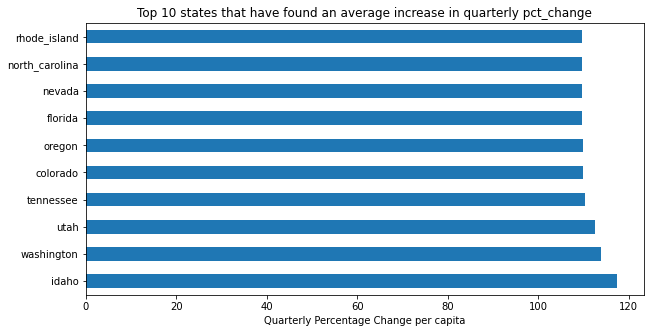

In [5]:
plt.figure(figsize = (10,5))
top_hpi.plot(kind = 'barh')
plt.title('Top 10 states that have found an average increase in quarterly pct_change')
plt.xlabel('Quarterly Percentage Change per capita')

In [6]:
#function to visualise all states- change df to hpi_hpi, hpi_pp, hpi_py 
def vis_state(data, regions = None, title="", xlab=None, ylab=None):
    plt.figure(figsize = (18,9))
    for x in regions:
        sns.lineplot(data = data, y = data[x], x= data.index)
    plt.legend(regions)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    plt.title(title, fontsize=26)

In [7]:
#top 5 most populated states
high_pop = ['california', 'texas', 'florida', 'new_york', 'pennsylvania']

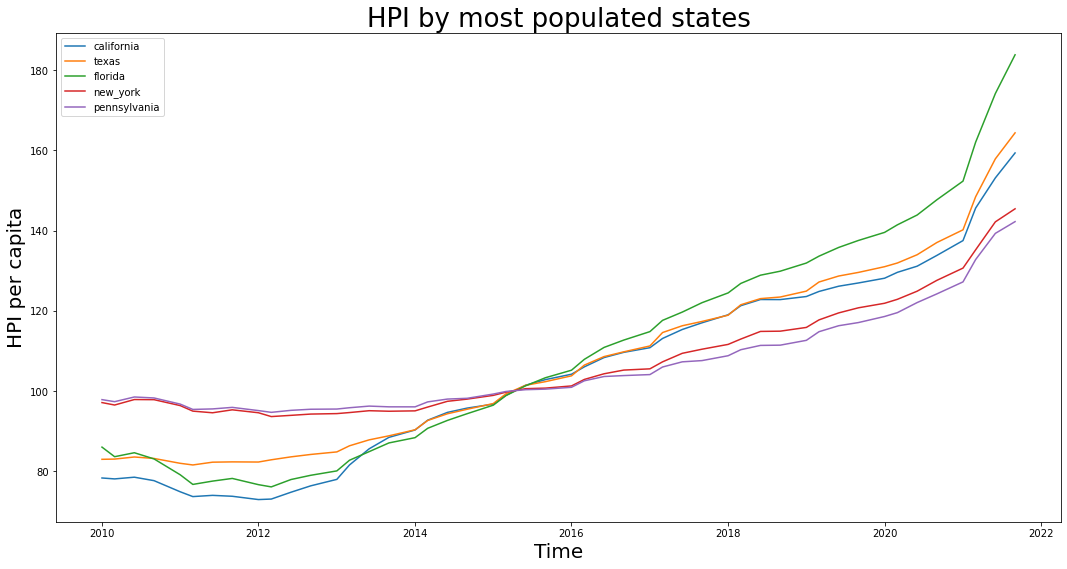

In [8]:
vis_state(hpi, high_pop, title = 'HPI by most populated states', xlab = 'Time', ylab = 'HPI per capita')

### Comparability of hpi vs fixed_30 of entire US

In [9]:
def start_date(df, date):
    start = (df.index >= date)
    df = df.loc[start]
    return df

In [10]:
#Making frm15 into quarterly means
mrcopy= mr.copy()
mrcopy['quarterly'] = mrcopy.index.to_period('Q')
#start date 2012
mrcopy = start_date(mrcopy, '2012-01-01')

#getting pct_change of frm15
fixed_quarterly = mrcopy.groupby('quarterly')['fixed_mortgage_15'].mean().to_frame().reset_index()

fixed_quarterly['fixed_mortgage_15'] = fixed_quarterly['fixed_mortgage_15'].diff()
fixed_quarterly = fixed_quarterly.fillna(0)
fixed_quarterly = fixed_quarterly[:-2]

In [11]:
#hpi representing 2012 onwards
hpi_pp_2012 = start_date(hpi, '2012-01-01')
hpi_pp_2012_us = hpi_pp_2012[['united_states']]
hpi_pp_2012_us = hpi_pp_2012_us.reset_index().rename(columns = {'united_states':'hpi_pct_chg'})
hpi_pp_2012_us['fmr15_pct_chg'] = fixed_quarterly['fixed_mortgage_15']

In [12]:
hpi_fixed = hpi_pp_2012_us.set_index('time')

In [13]:
hpi_fixed.head()

,hpi_pct_chg,fmr15_pct_chg
time,,
2012-01-01,86.803,0.000000
2012-03-01,86.414,-0.145385
2012-06-01,87.562,-0.204615
2012-09-01,88.247,-0.167692
2013-01-01,88.690,0.066923


15 year mortgage rate has a negative relationship to hpi.

Text(0.5, 1.0, 'Quarterly percentage change of the hpi and the fixed 30 year mortage rate (2012-2022)')

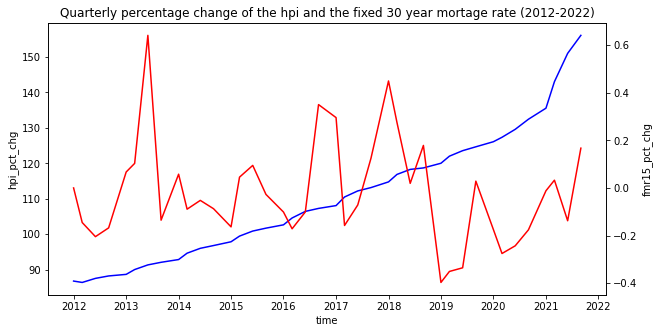

In [14]:
#we can see that it references 2015 hpi
plt.figure(figsize=(10, 5))
sns.lineplot(data = hpi_fixed, y = hpi_fixed['hpi_pct_chg'], x= hpi_fixed.index, color = 'b', legend = True)
ax2 = plt.twinx()
sns.lineplot(data = hpi_fixed, y = hpi_fixed['fmr15_pct_chg'], x= hpi_fixed.index, color = 'r', legend = True)
plt.title('Quarterly percentage change of the hpi and the fixed 30 year mortage rate (2012-2022)')

Findings:<br>
- all distributions seem to be skewed positively

            count        mean        std     min       25%       50%  \
idaho        48.0  117.402667  36.229403  81.558  90.55850  103.2940   
washington   48.0  113.900854  29.780749  81.194  88.37700  104.3875   
utah         48.0  112.588313  29.280753  81.195  87.70425  103.1535   
tennessee    48.0  110.334313  21.260370  89.699  92.57725  102.5200   
colorado     48.0  109.819625  28.617987  76.919  81.04575  104.7550   

                  75%      max  
idaho       137.08450  222.515  
washington  135.98025  188.316  
utah        131.35450  194.879  
tennessee   123.95150  171.897  
colorado    133.00575  176.230  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2010-01-01 to 2021-09-01
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   idaho       48 non-null     float64
 1   washington  48 non-null     float64
 2   utah        48 non-null     float64
 3   tennessee   48 non-null     float64


/Users/jayrussell/Desktop/GA/projects/team-project-5/utils.py:173: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16, 9))


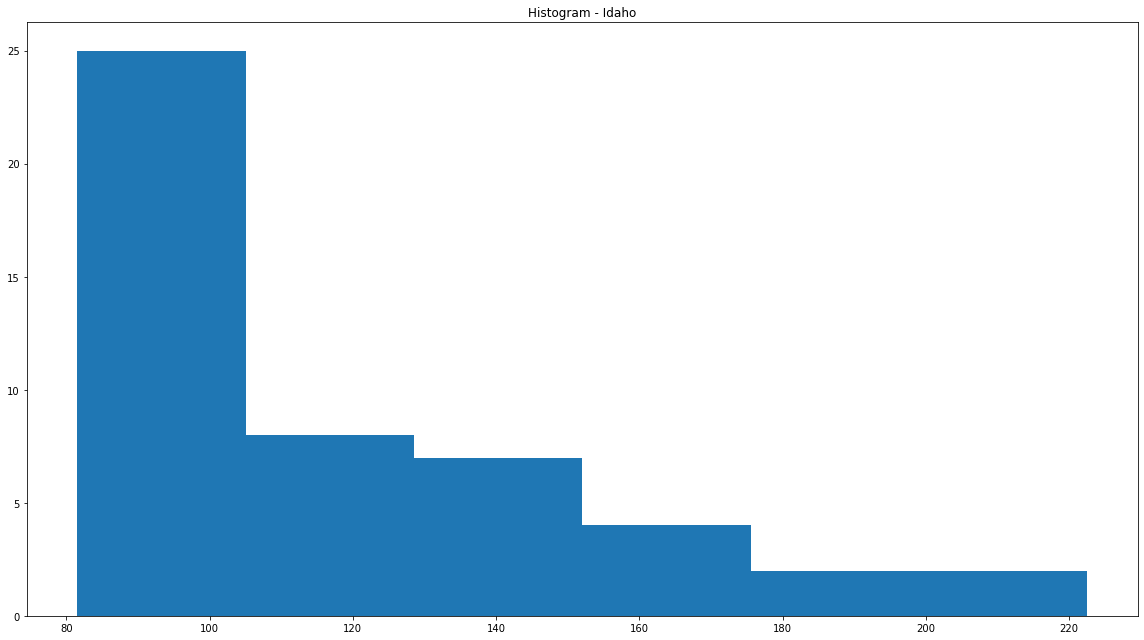

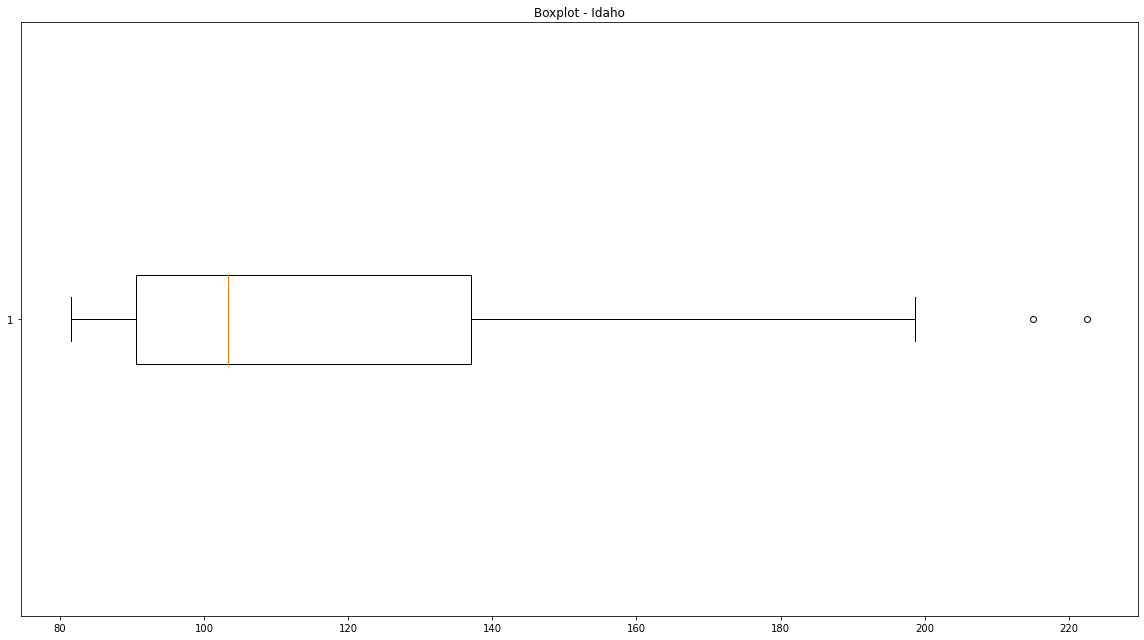

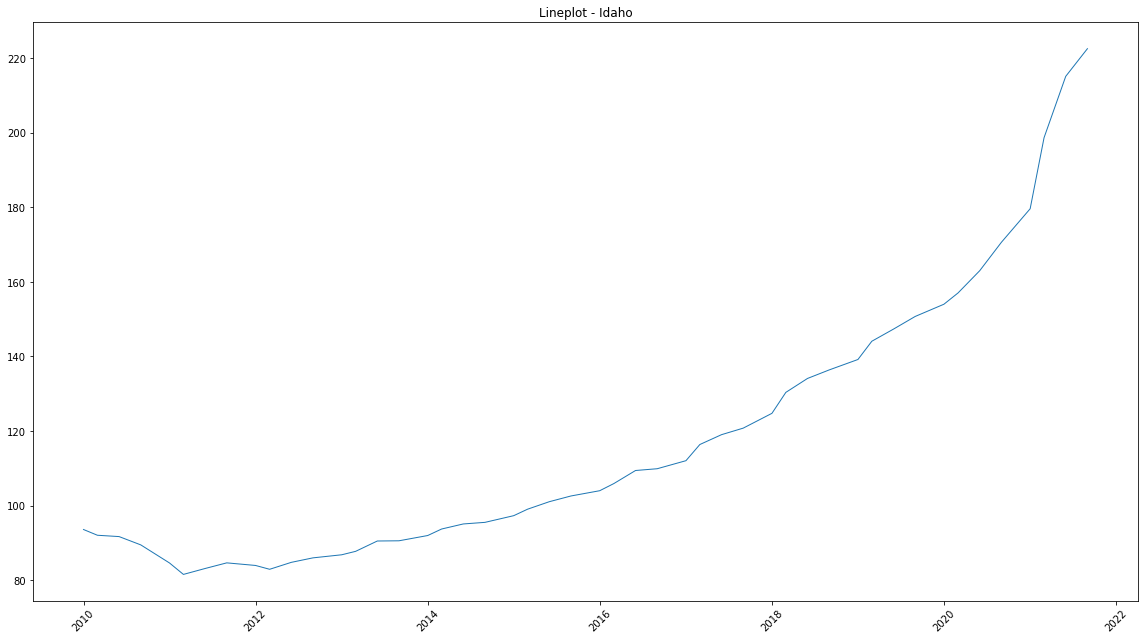

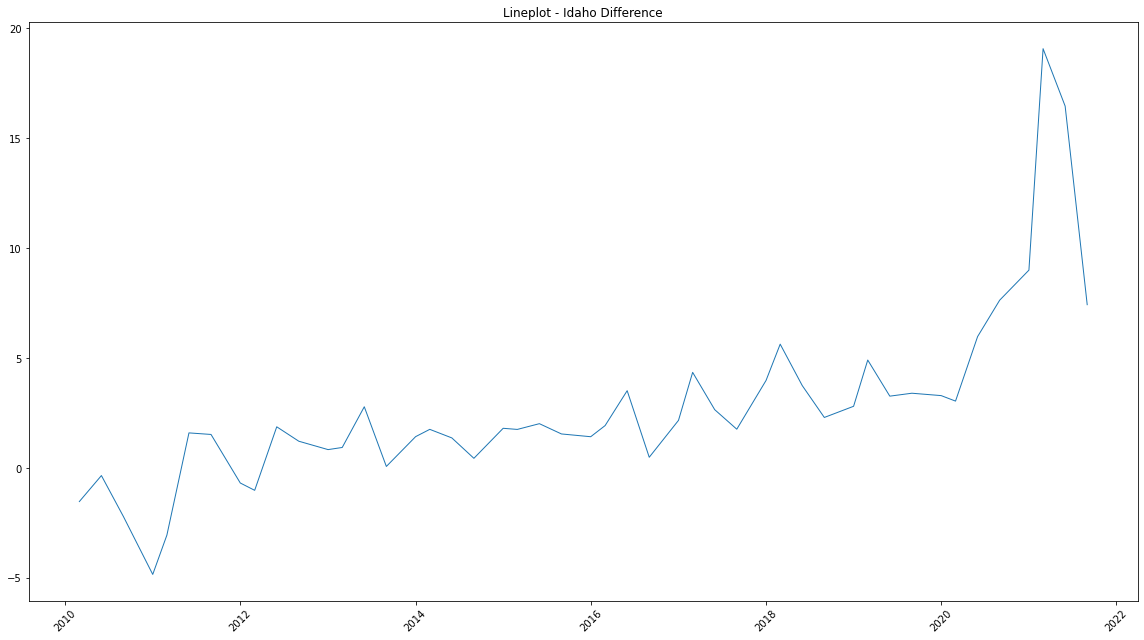

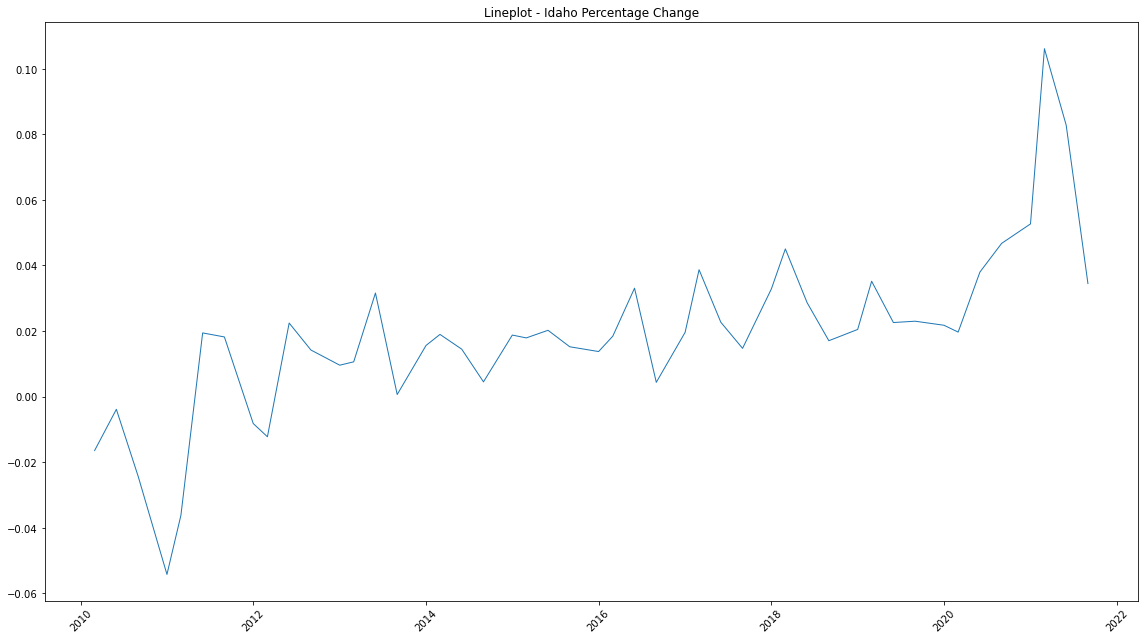

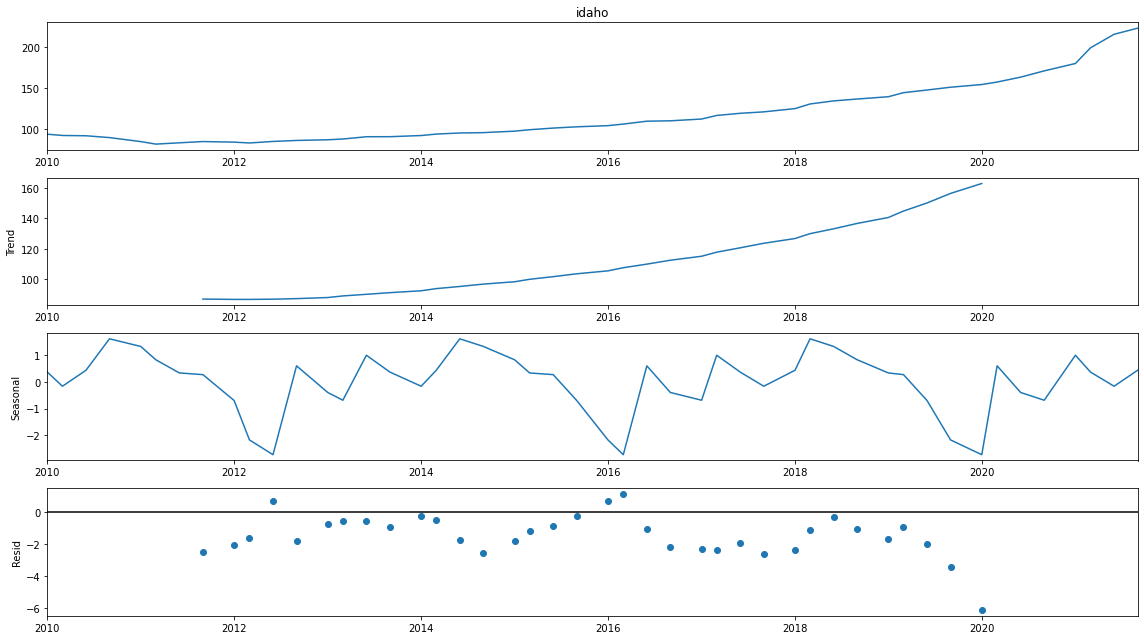

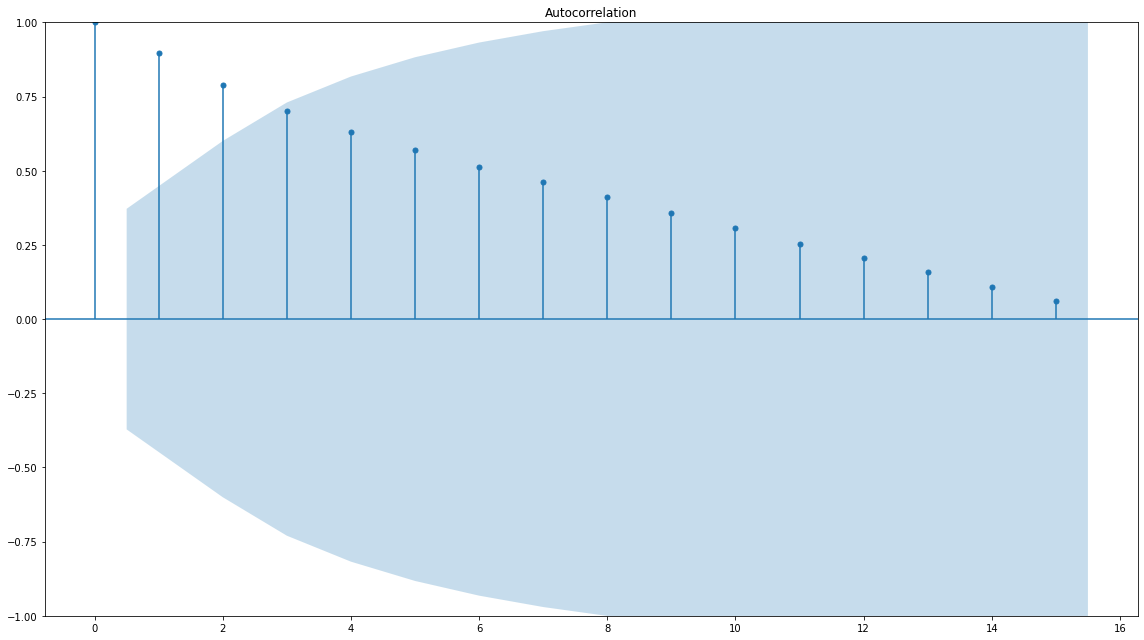

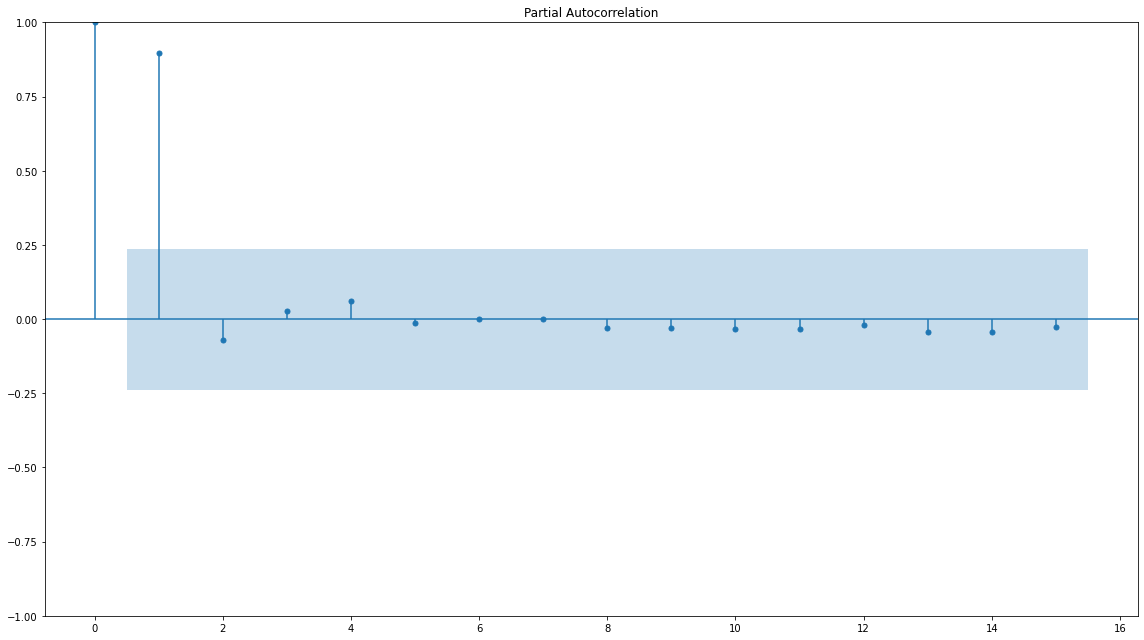

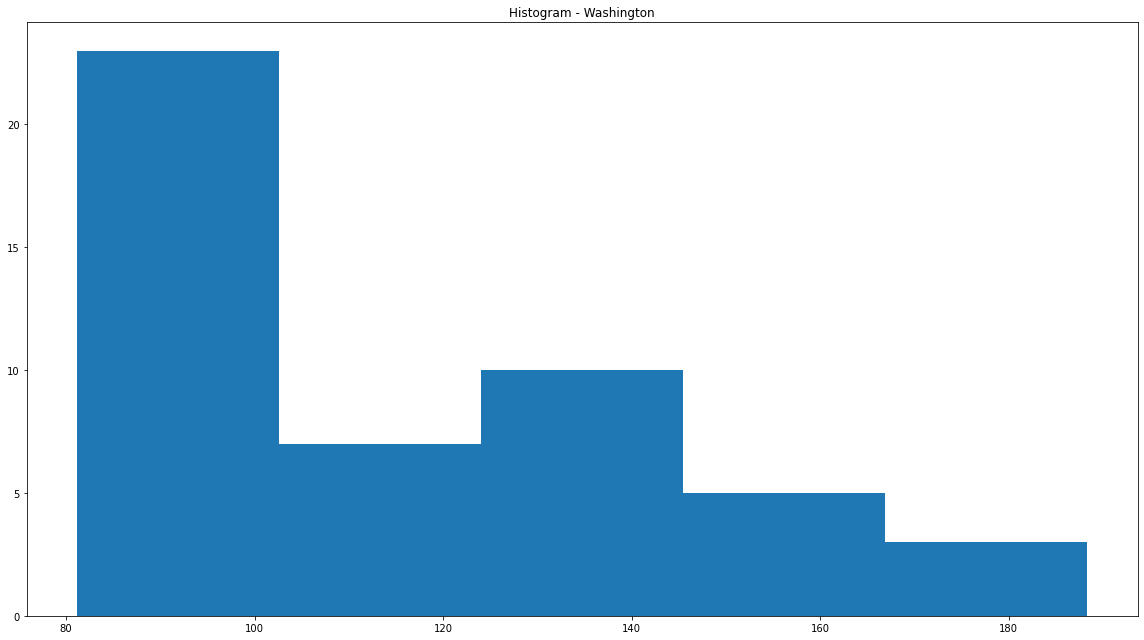

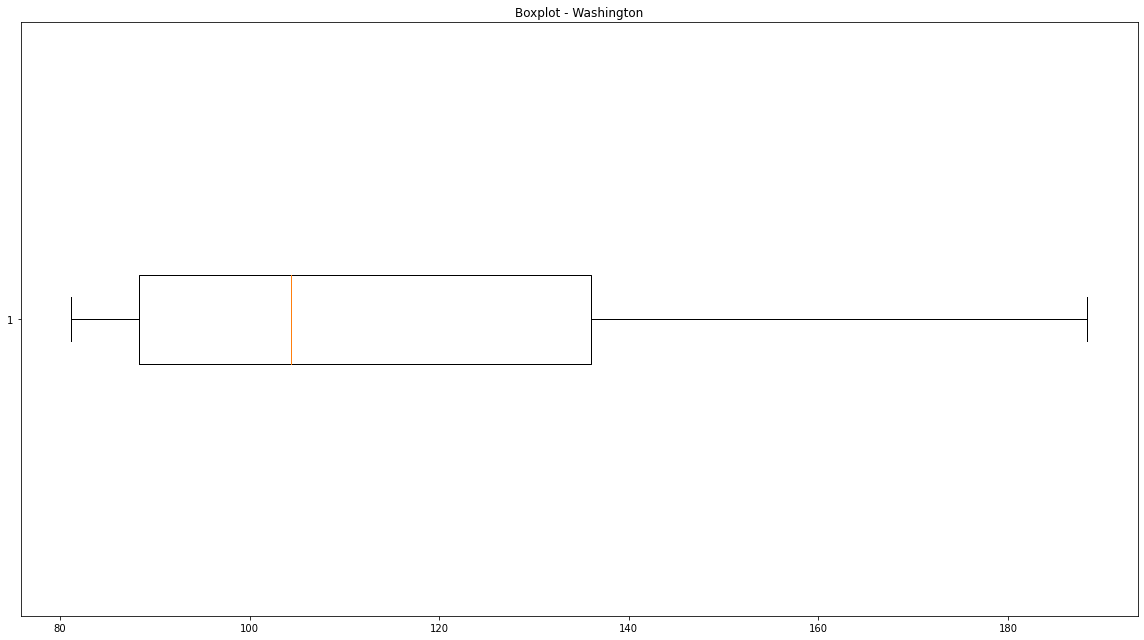

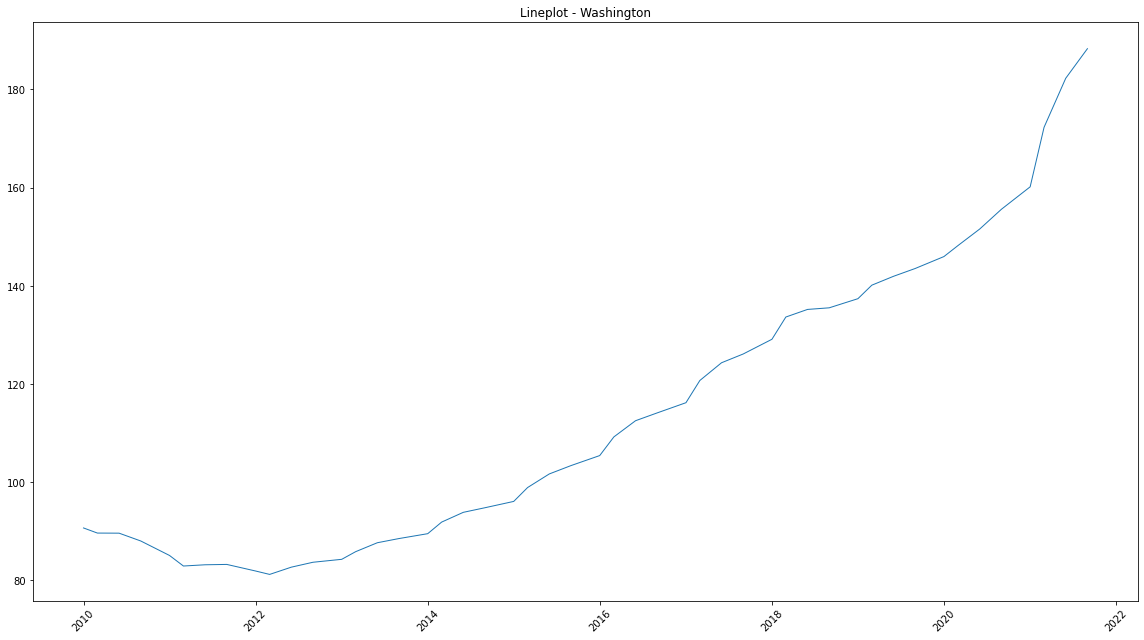

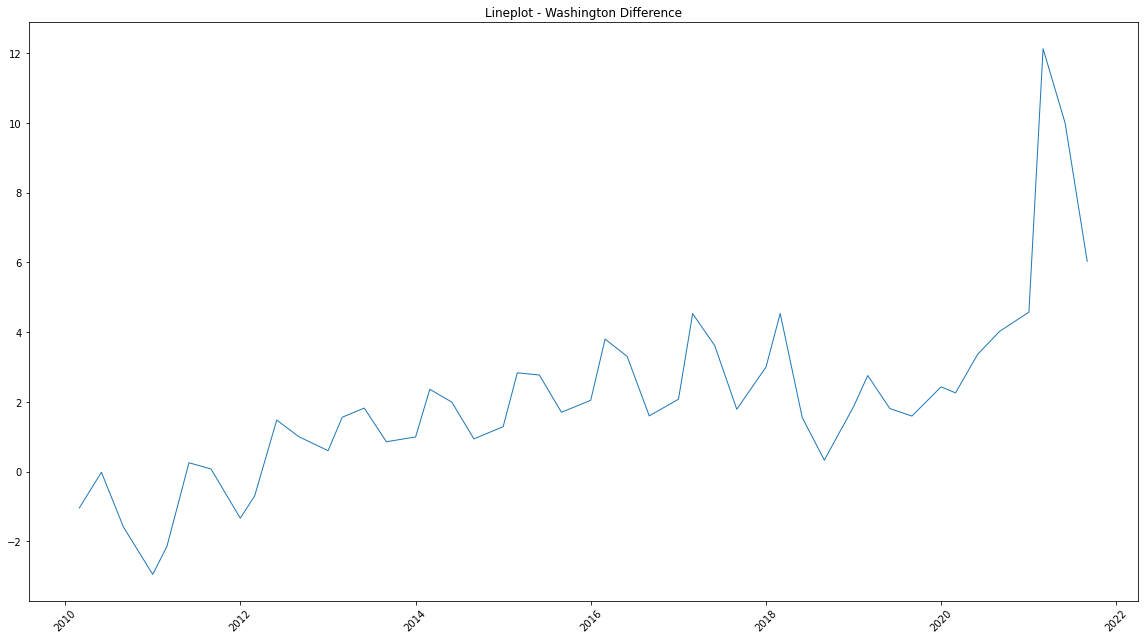

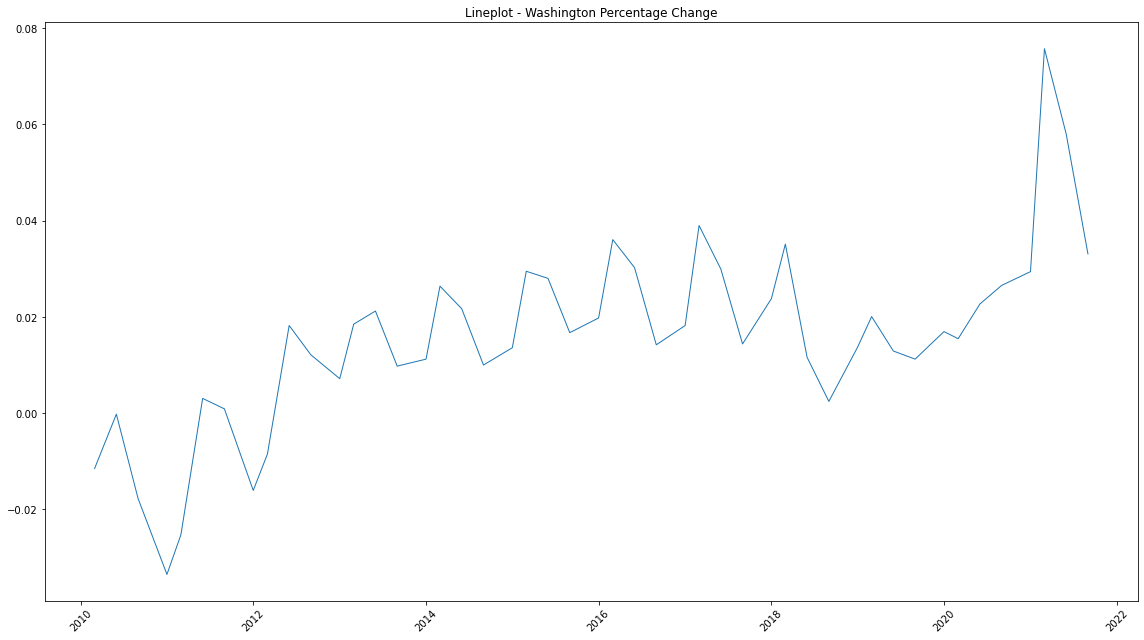

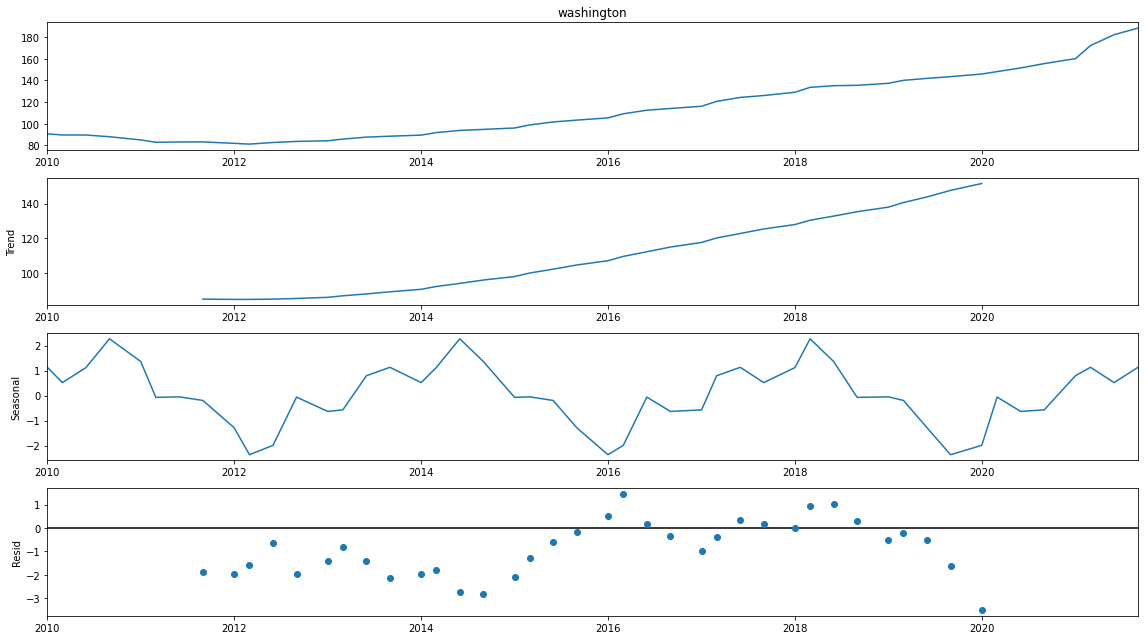

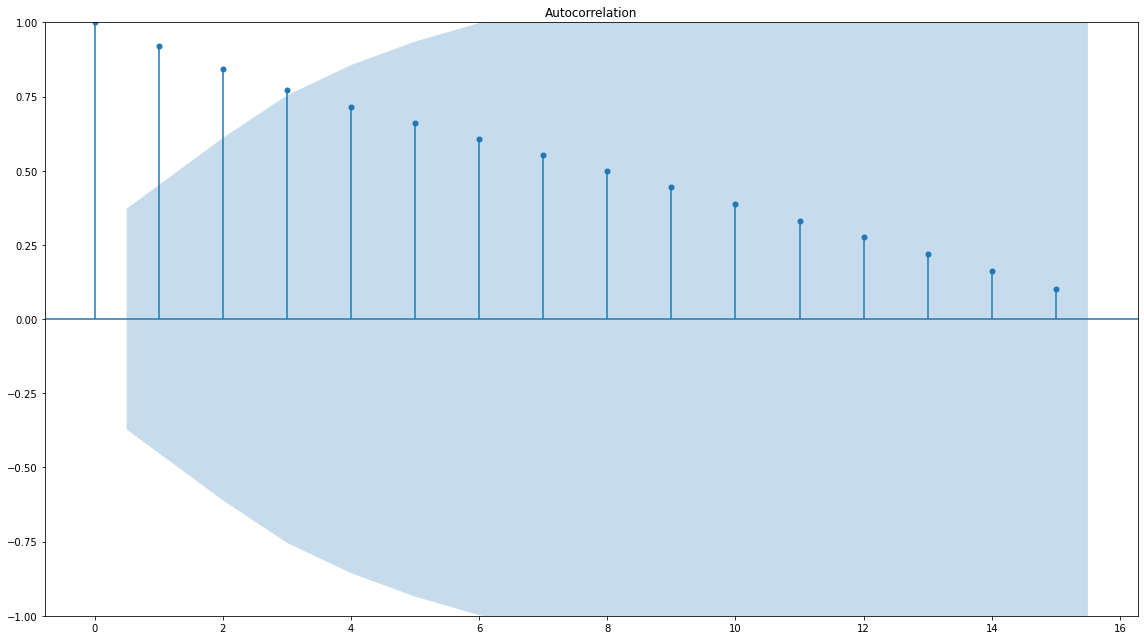

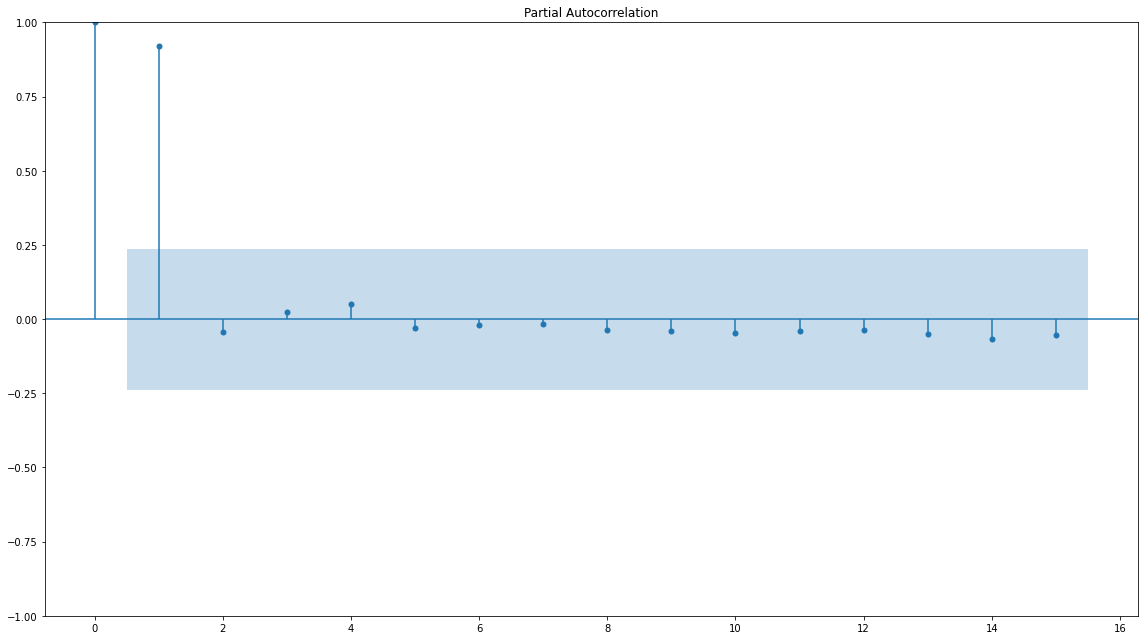

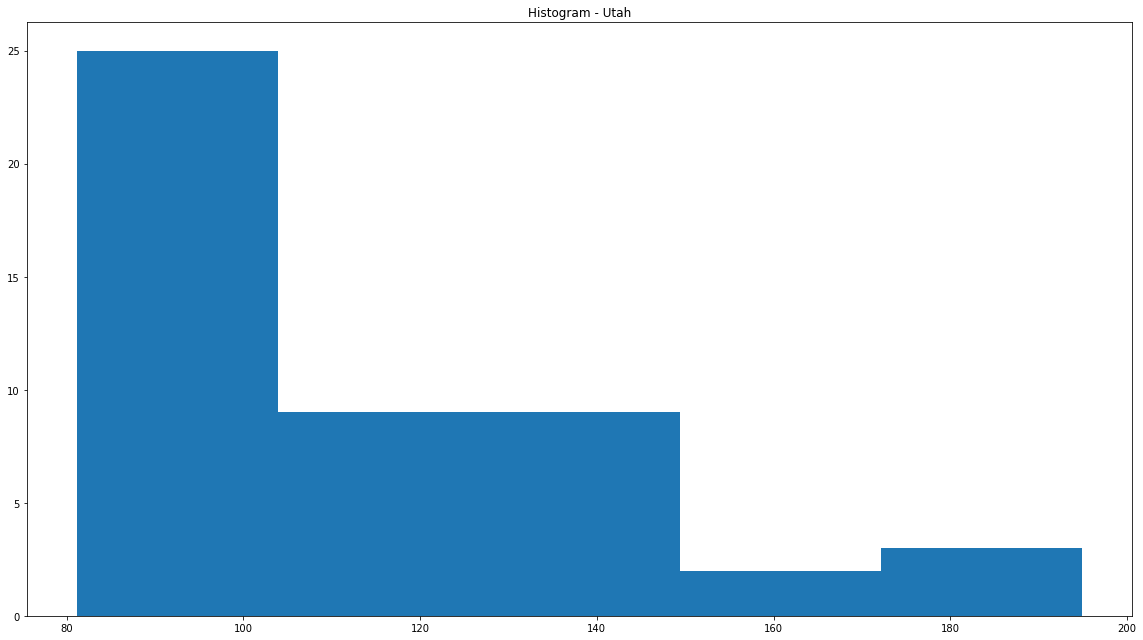

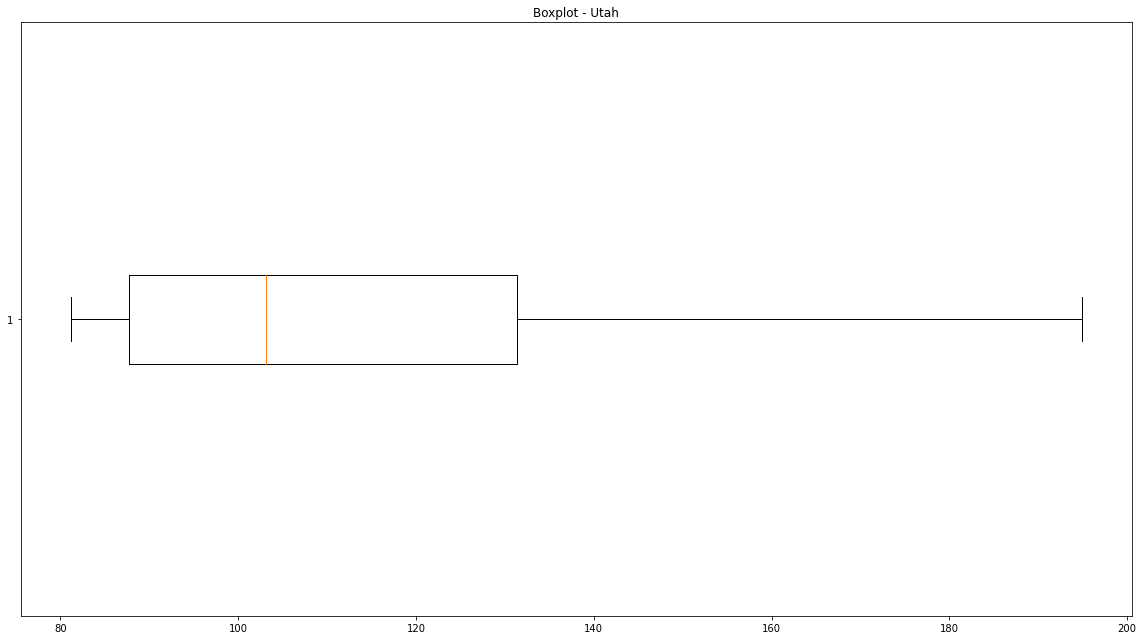

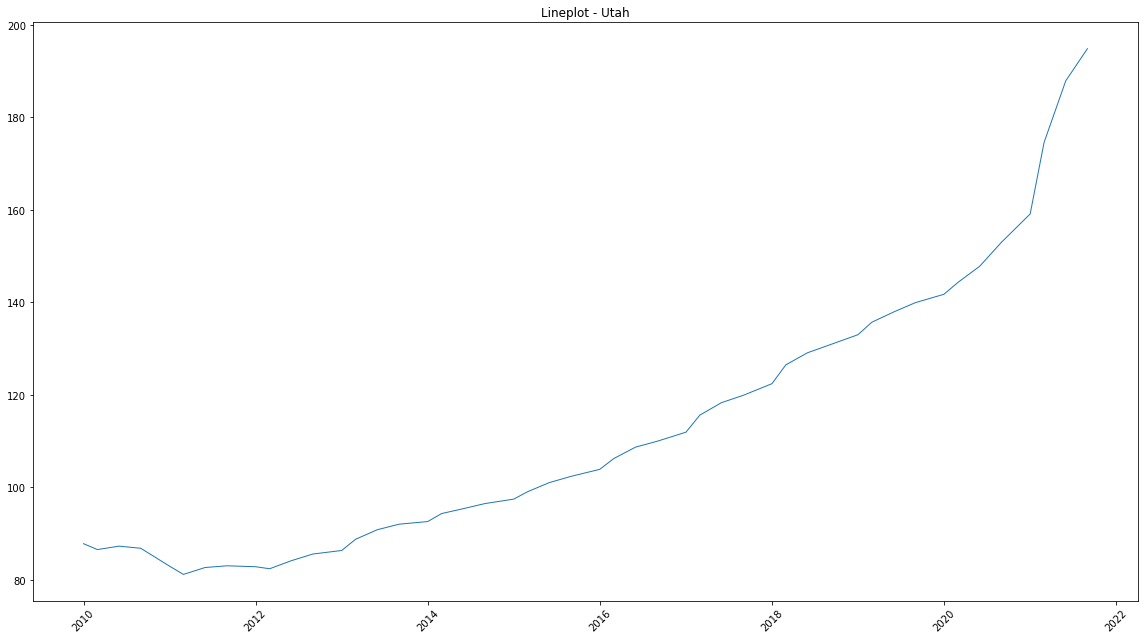

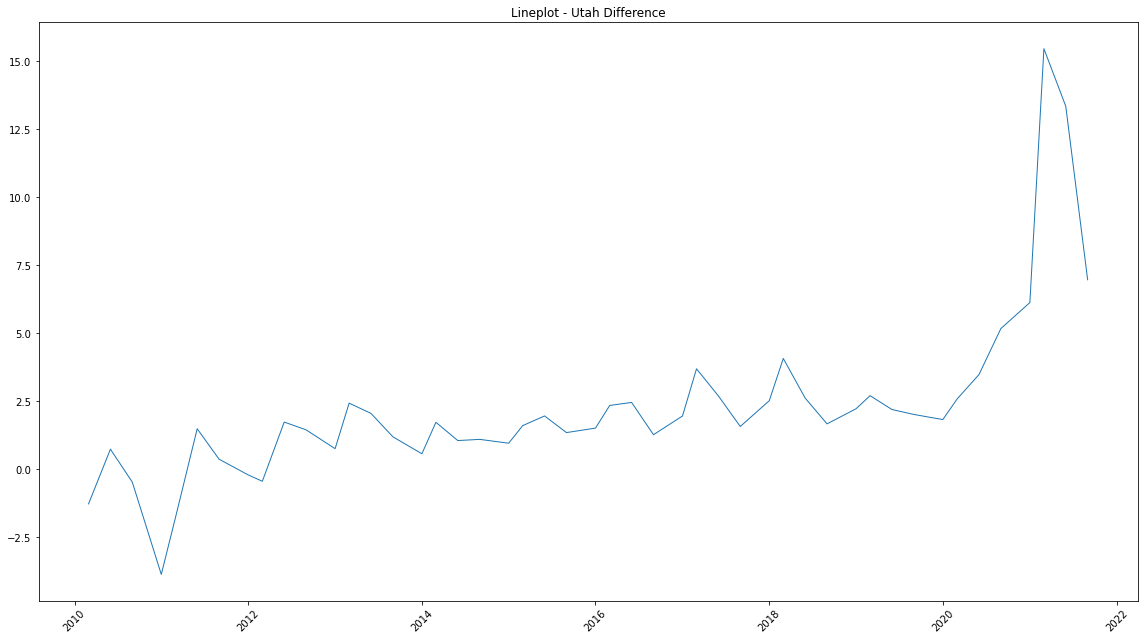

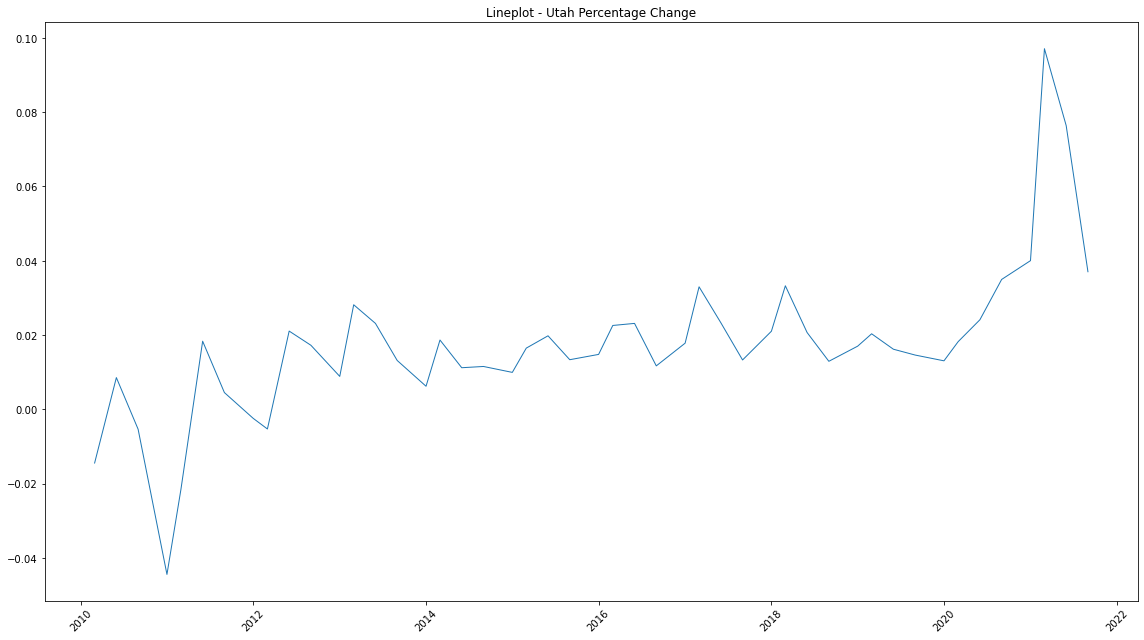

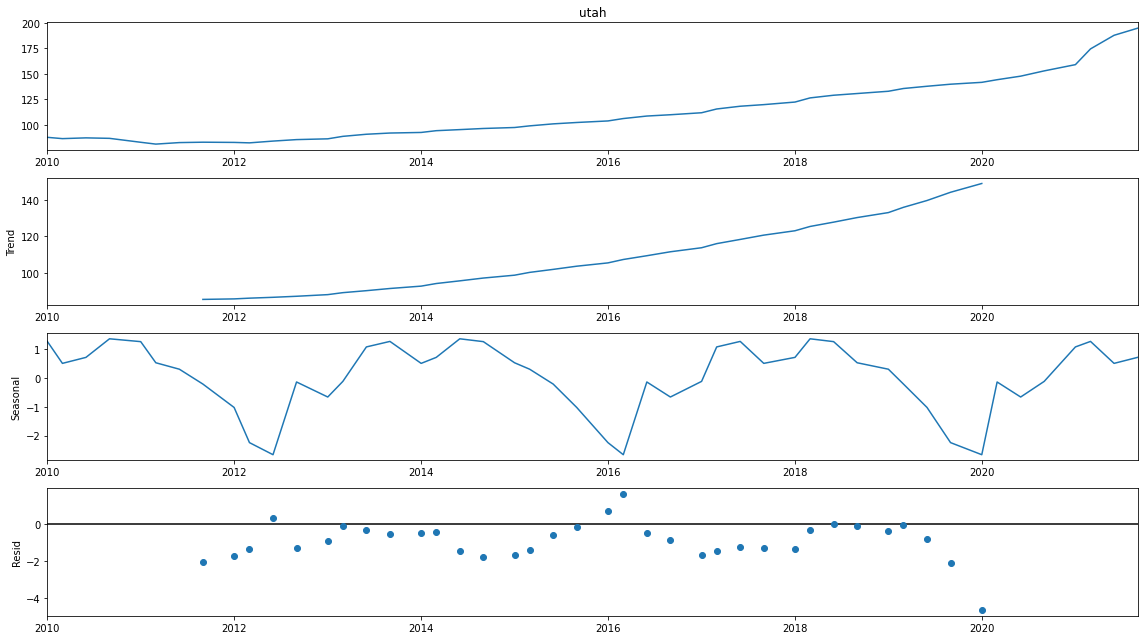

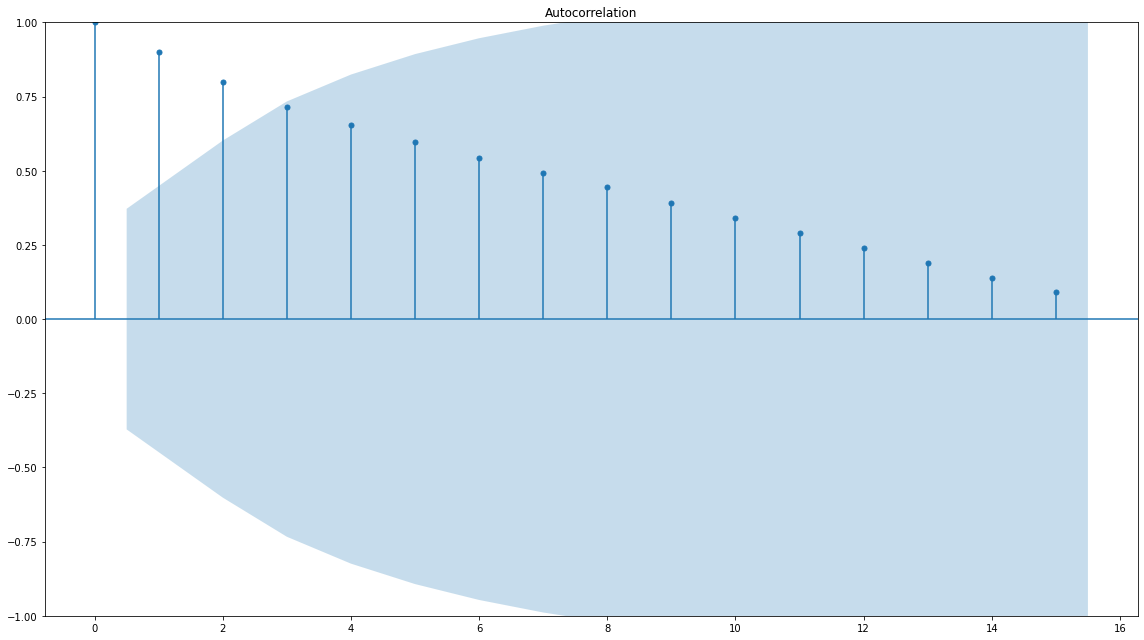

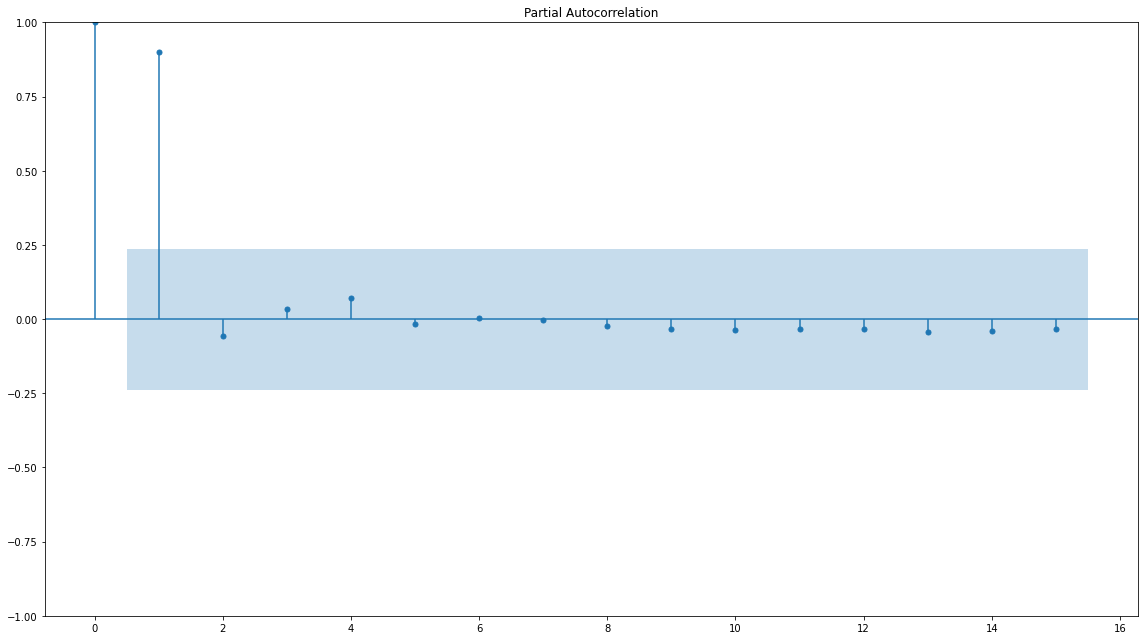

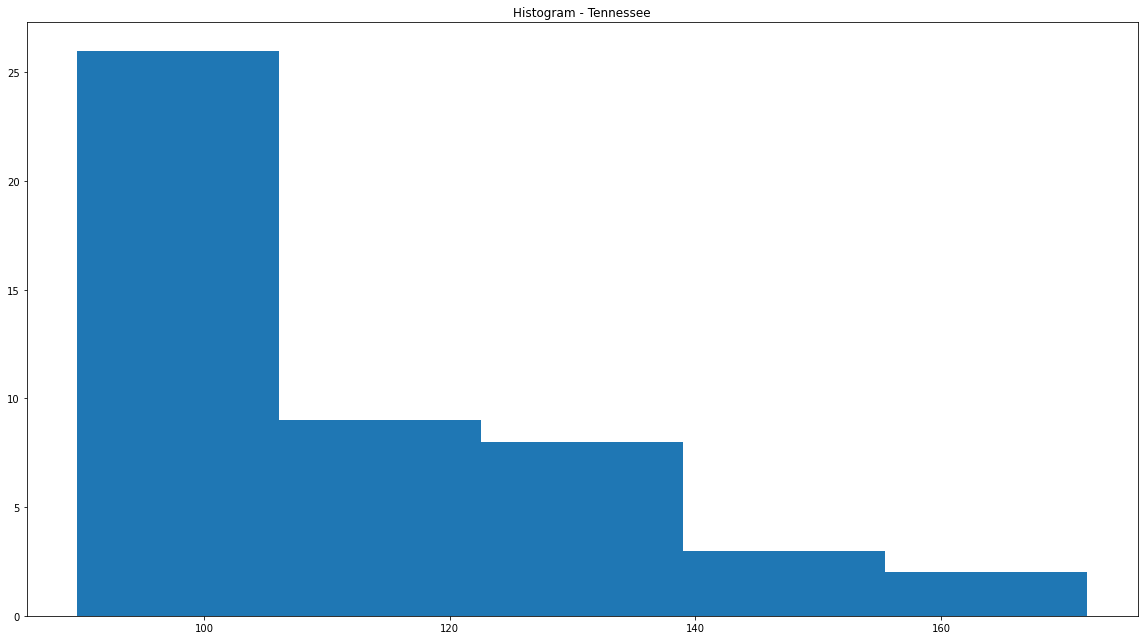

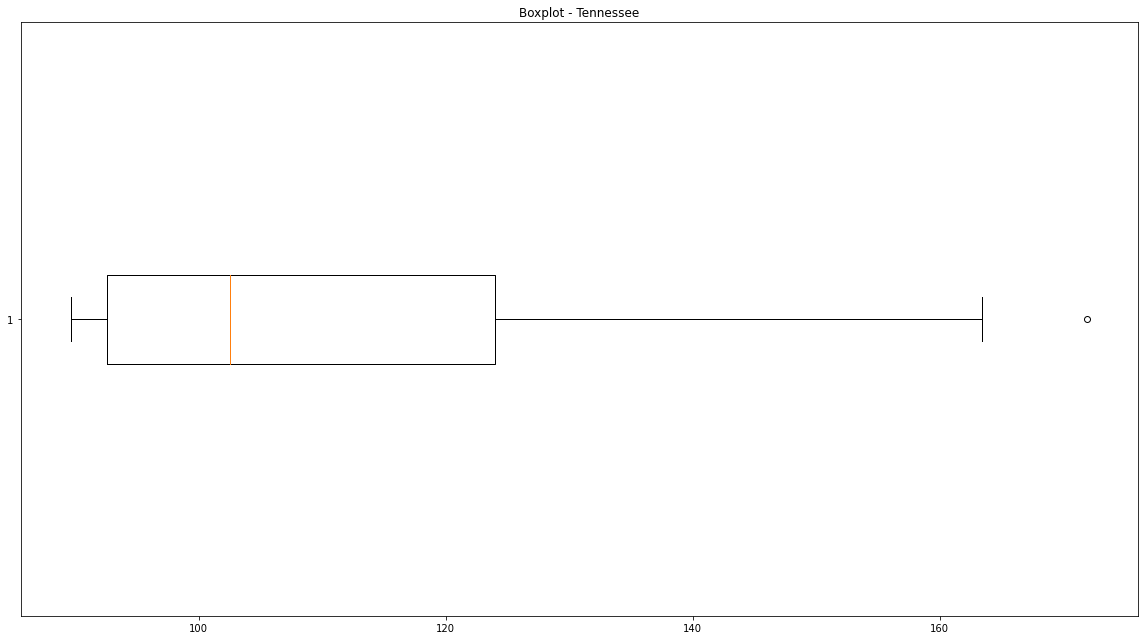

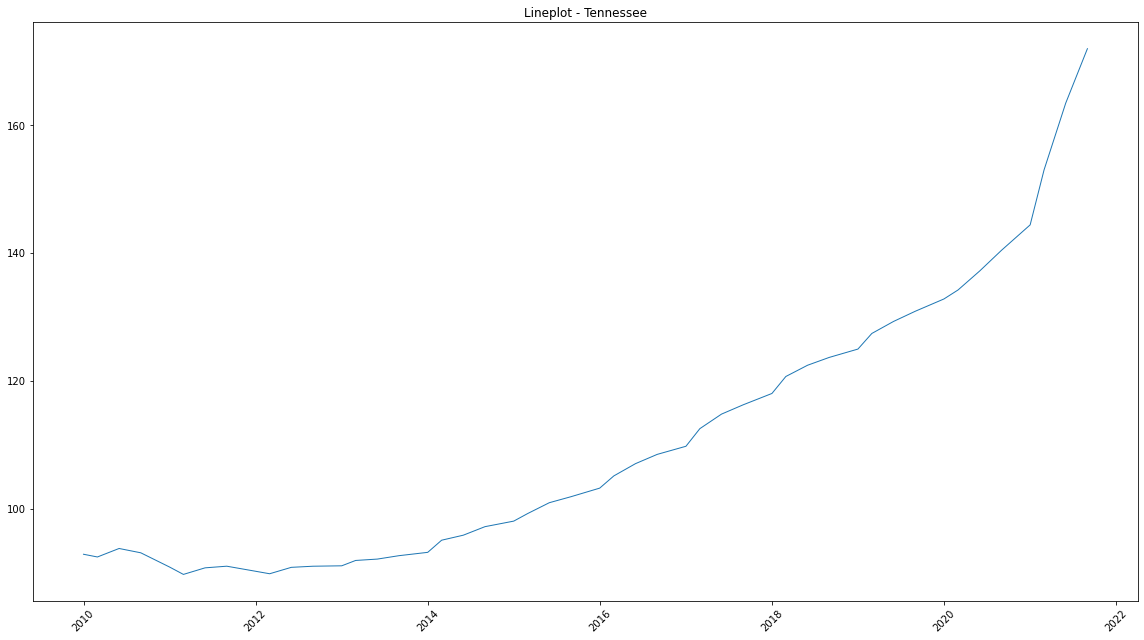

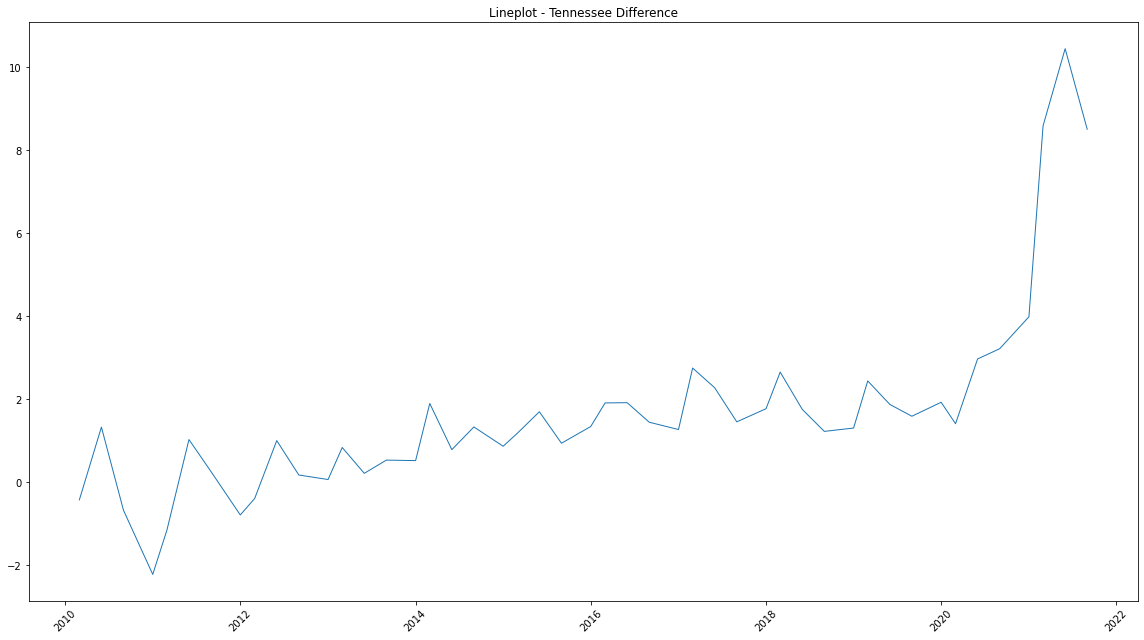

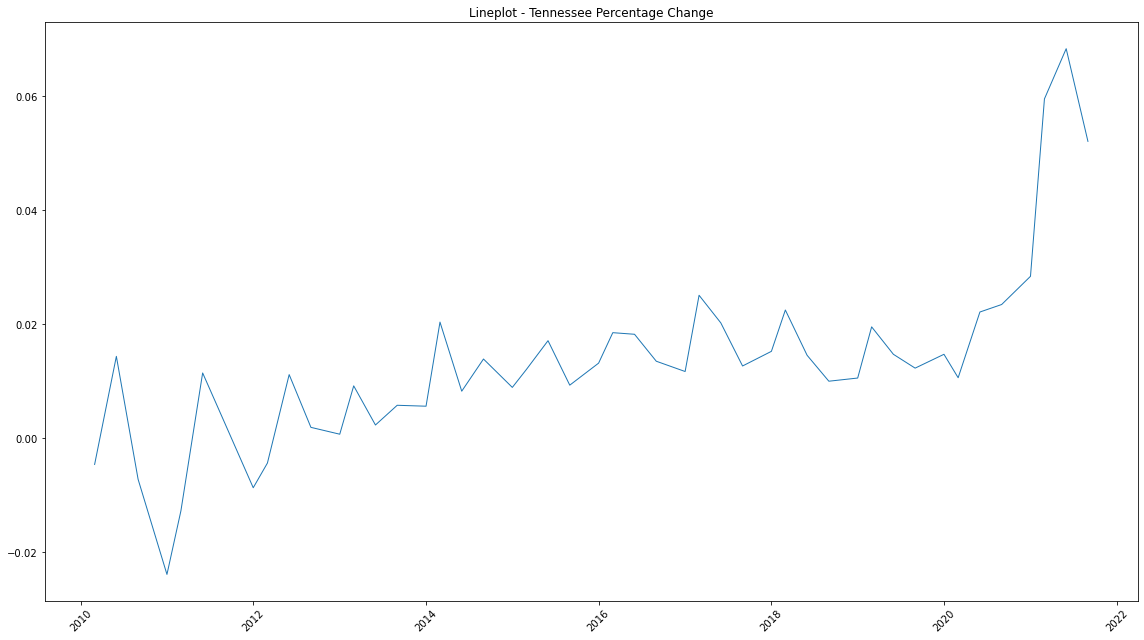

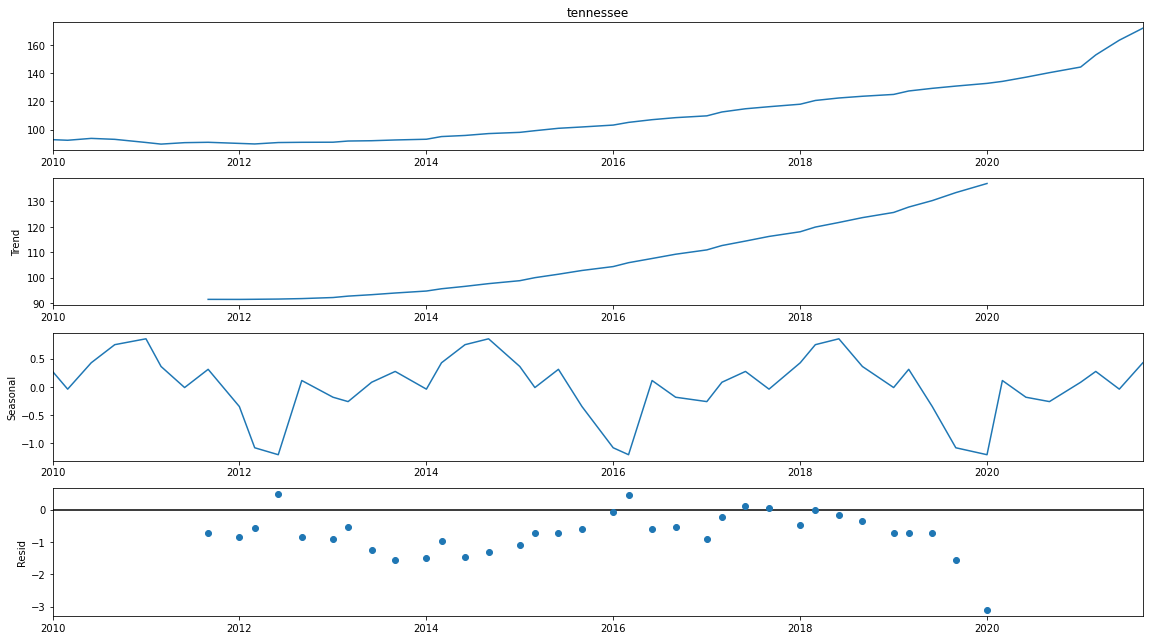

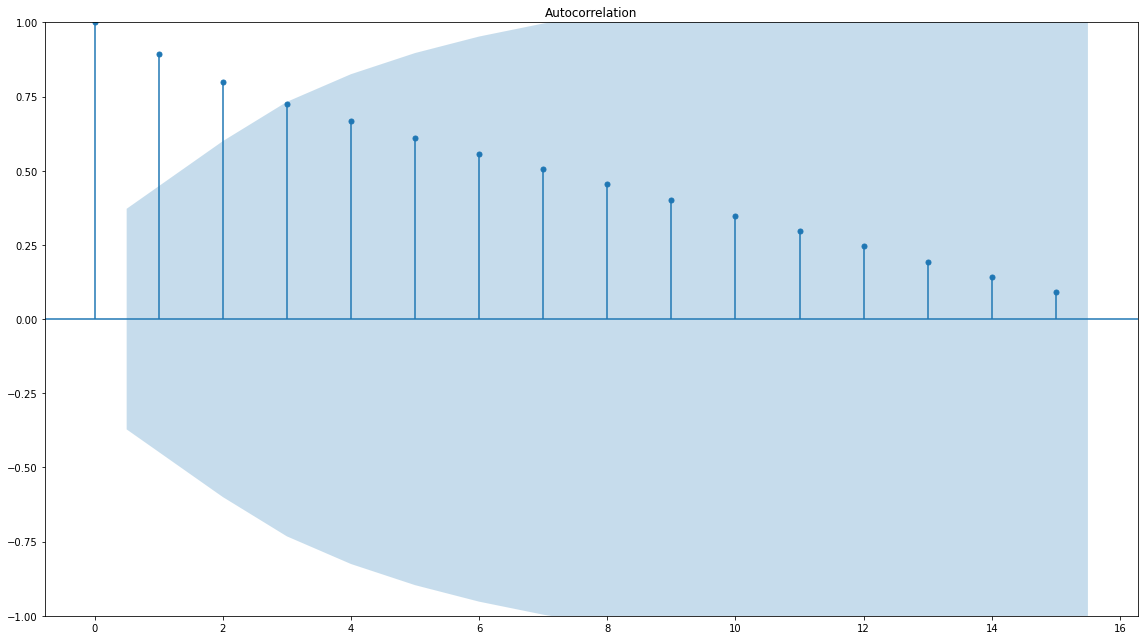

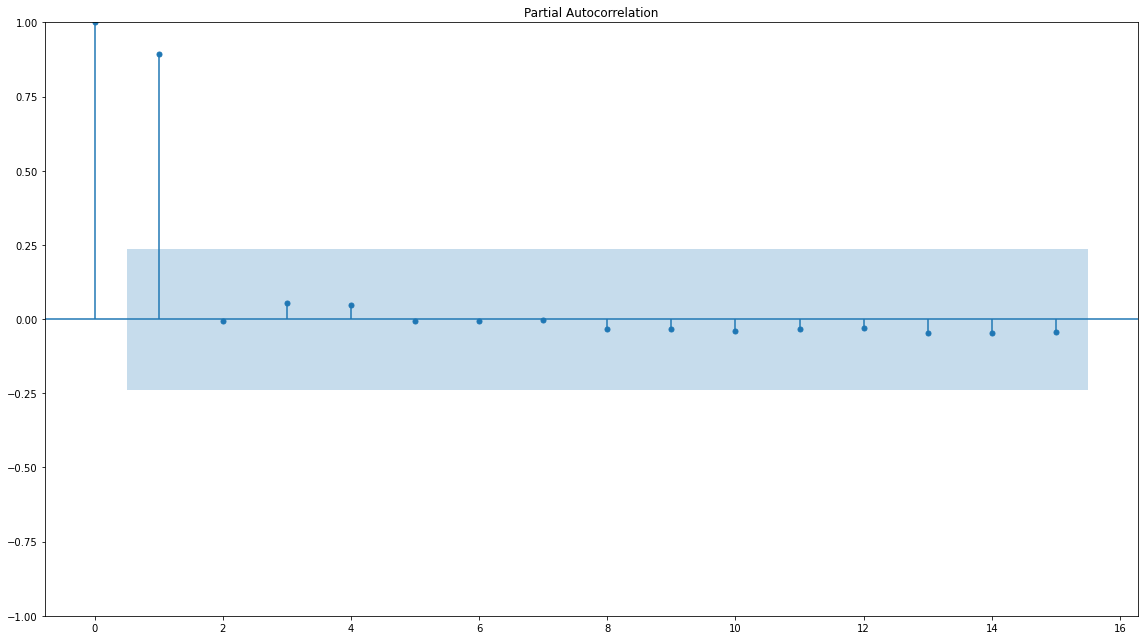

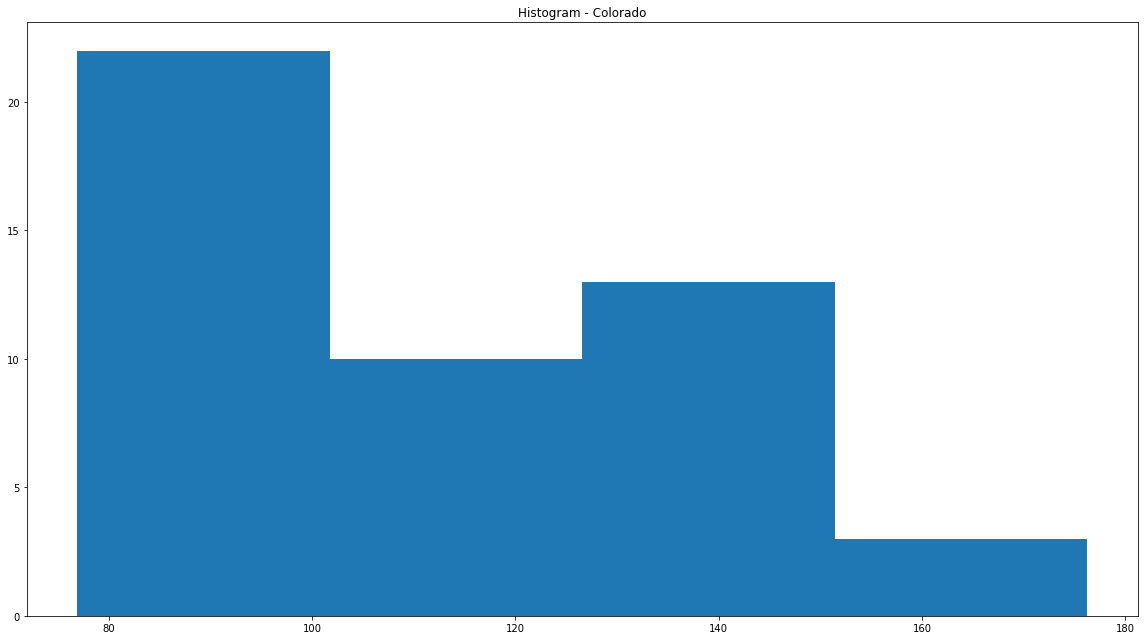

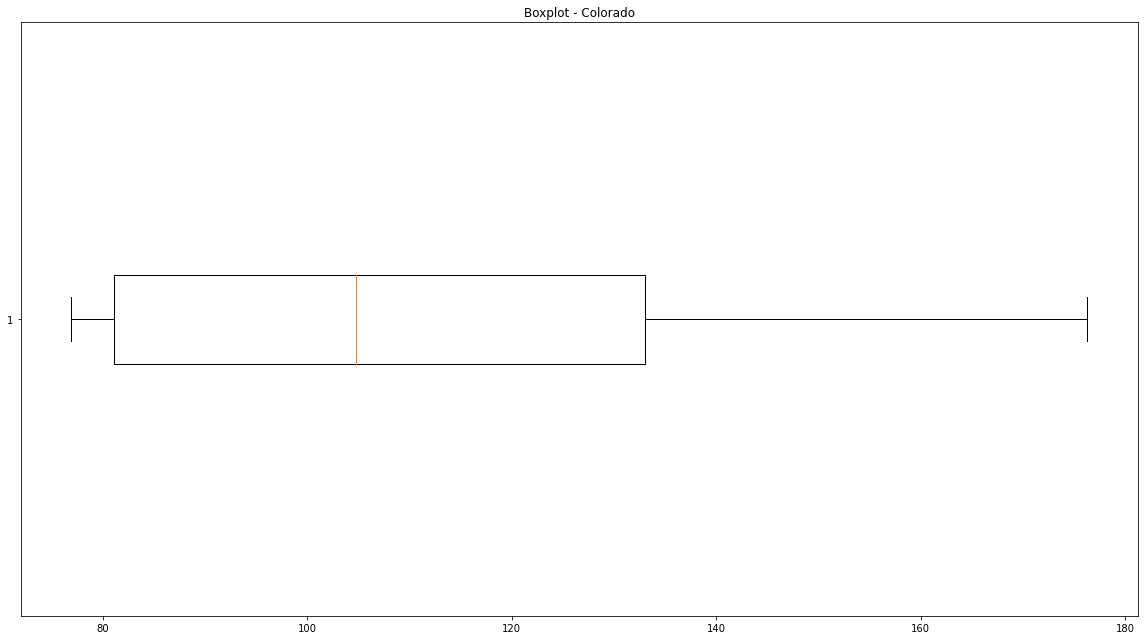

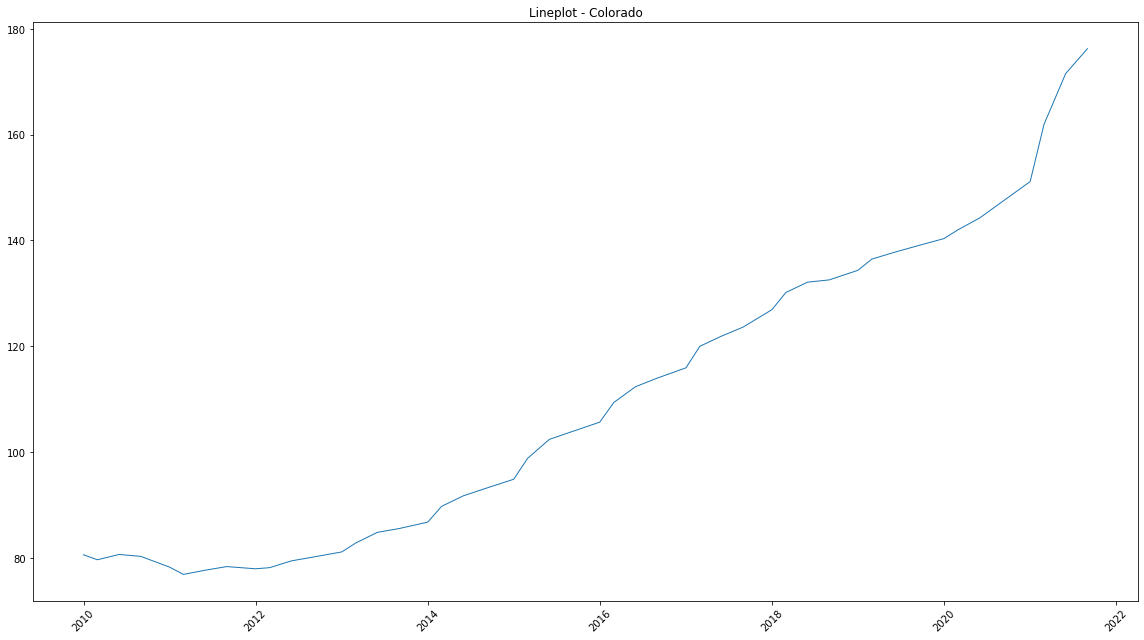

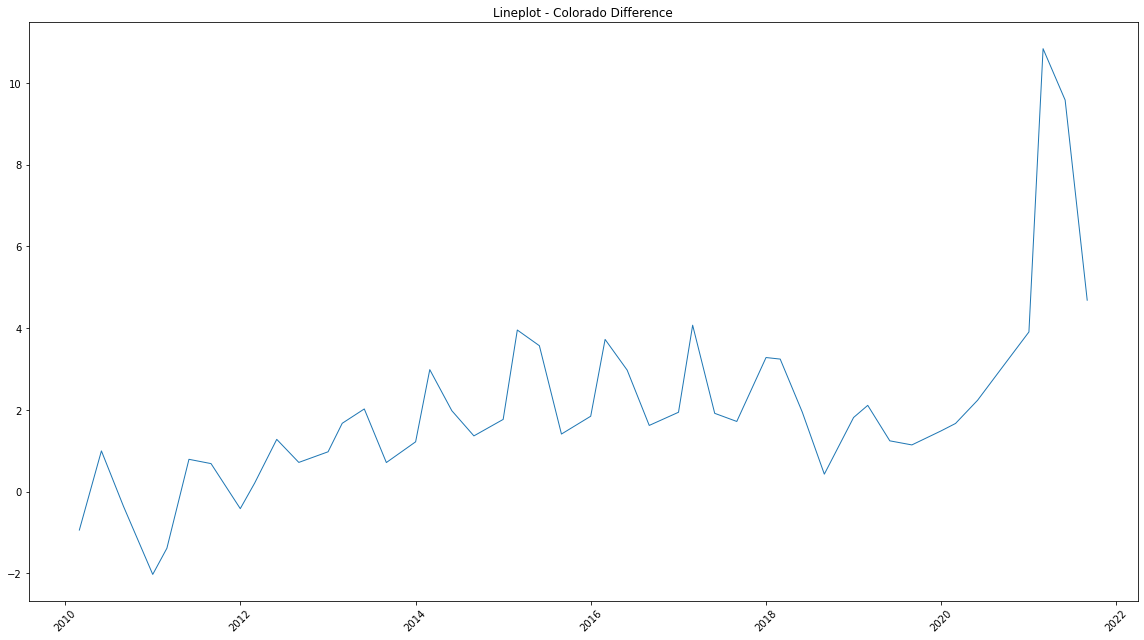

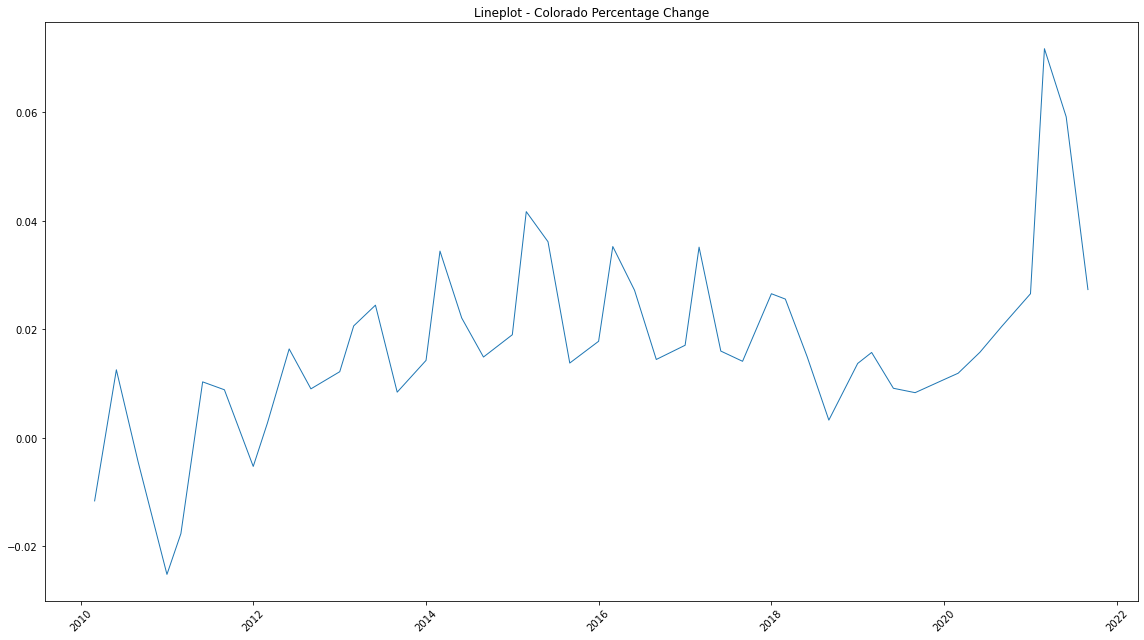

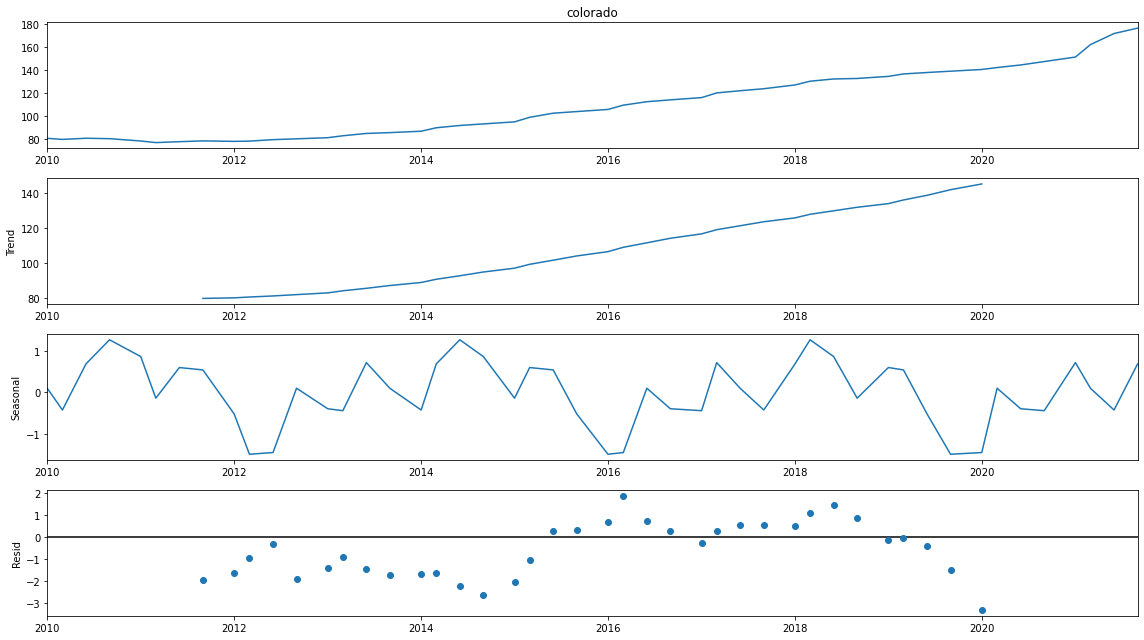

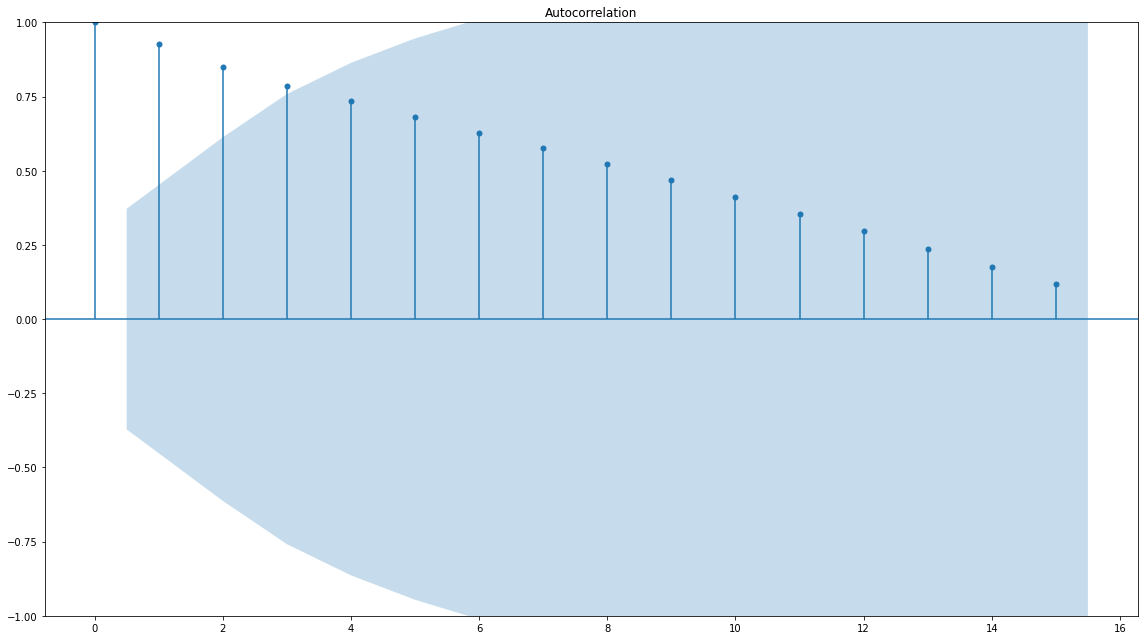

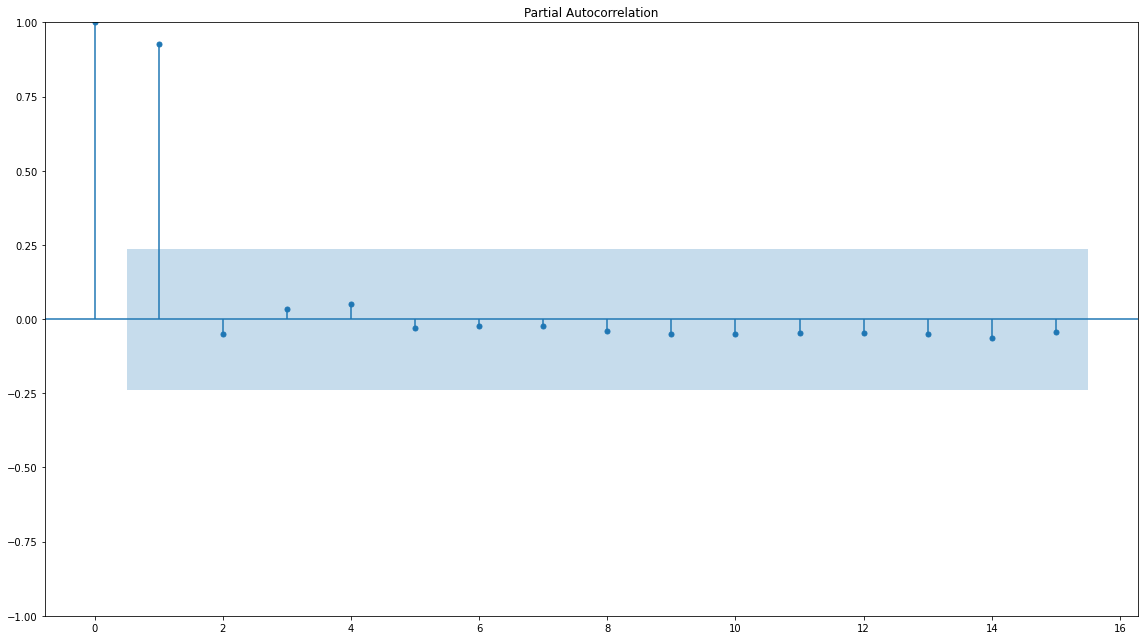

In [15]:
#using pct_chg data instead of actual index values to have some stationarity in data for EDA
utils.eda_charts(hpi[top_5], period = 15, lags =15)